<a href="https://colab.research.google.com/github/nureeee/Machhine-Learning/blob/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EB%84%98%ED%8C%8C%EC%9D%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

# 데이터 불러오기

In [ ]:
# csv파일 판다스로 불러오기
df = pd.read_csv('/content/drive/MyDrive/bike_train.csv')
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [ ]:
df.values

array([['2011-01-01 00:00:00', 1, 0, ..., 3, 13, 16],
       ['2011-01-01 01:00:00', 1, 0, ..., 8, 32, 40],
       ['2011-01-01 02:00:00', 1, 0, ..., 5, 27, 32],
       ...,
       ['2012-12-19 21:00:00', 4, 0, ..., 4, 164, 168],
       ['2012-12-19 22:00:00', 4, 0, ..., 12, 117, 129],
       ['2012-12-19 23:00:00', 4, 0, ..., 4, 84, 88]], dtype=object)

# 판다스 데이터 프레임을 넘파이로 바꾸기
 판다스로 불러온 DF데이터세트를 np_df의 넘파이로 불러옴

In [ ]:
np_df = np.array(df)
np_df

array([['2011-01-01 00:00:00', 1, 0, ..., 3, 13, 16],
       ['2011-01-01 01:00:00', 1, 0, ..., 8, 32, 40],
       ['2011-01-01 02:00:00', 1, 0, ..., 5, 27, 32],
       ...,
       ['2012-12-19 21:00:00', 4, 0, ..., 4, 164, 168],
       ['2012-12-19 22:00:00', 4, 0, ..., 12, 117, 129],
       ['2012-12-19 23:00:00', 4, 0, ..., 4, 84, 88]], dtype=object)

# 텍스트 시계열 데이터를 날짜데이터로 변환하기

In [ ]:
# 파이썬 내장한수 사용
from datetime import date
import datetime

In [ ]:
# 원본 데이터에서 object로 되어있는 시계열 텍스트 데이터 저장
date_time_obj = np_df[:,0]
date_time_obj

array(['2011-01-01 00:00:00', '2011-01-01 01:00:00',
       '2011-01-01 02:00:00', ..., '2012-12-19 21:00:00',
       '2012-12-19 22:00:00', '2012-12-19 23:00:00'], dtype=object)

In [ ]:
# 날짜 텍스트를 날짜 데이터로 변환
date_list = []
for i in date_time_obj:
    a = datetime.datetime.fromisoformat(i)
    date_list.append(a)

In [ ]:
# 데이터가 잘 변환되었는지 확인하기
date_list[0].hour

0

In [ ]:
# 데이터 복사하기
df_copy = np_df.copy()
np_df.shape

(10886, 12)

In [ ]:
# 날짜 텍스트 데이터를 삭제  
df_copy = np.delete(df_copy, 0, axis=1)
df_copy

array([[1, 0, 0, ..., 3, 13, 16],
       [1, 0, 0, ..., 8, 32, 40],
       [1, 0, 0, ..., 5, 27, 32],
       ...,
       [4, 0, 1, ..., 4, 164, 168],
       [4, 0, 1, ..., 12, 117, 129],
       [4, 0, 1, ..., 4, 84, 88]], dtype=object)

In [ ]:
df_copy.shape
# 해당 데이터가 삭제된 것을 볼 수 있다.

(10886, 11)

In [ ]:
# 리스트를 넘파이로 변환
date_list = np.array(date_list)
date_list.shape

(10886,)

In [ ]:
# 2차 배열로 변환
date_list = date_list.reshape(-1, 1)
date_list.shape

(10886, 1)

In [ ]:
# 두개의 배열 합치기
data1 = np.hstack((date_list, df_copy))
data1

array([[datetime.datetime(2011, 1, 1, 0, 0), 1, 0, ..., 3, 13, 16],
       [datetime.datetime(2011, 1, 1, 1, 0), 1, 0, ..., 8, 32, 40],
       [datetime.datetime(2011, 1, 1, 2, 0), 1, 0, ..., 5, 27, 32],
       ...,
       [datetime.datetime(2012, 12, 19, 21, 0), 4, 0, ..., 4, 164, 168],
       [datetime.datetime(2012, 12, 19, 22, 0), 4, 0, ..., 12, 117, 129],
       [datetime.datetime(2012, 12, 19, 23, 0), 4, 0, ..., 4, 84, 88]],
      dtype=object)

넘파이로는 seaborn으로 시각화를 할 수 없다...

In [ ]:
# years = []

# for date in data:
#     years.append(date[0].year)

# s = pd.DataFrame(pd.Series(years, name="v"))
# sns.countplot(data=s, x='v')



# figure, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
# figure.set_size_inches(18,8)

# sns.barplot(data=data, x=data.year, y='count', ax=ax1)
# sns.barplot(data=data, x=data.month, y='count', ax=ax2)
# sns.barplot(data=data, x=[datetime.datetime].day, y='count', ax=ax3)
# sns.barplot(data=data, x=[datetime.datetime].hour, y='count', ax=ax4)

# ax1.set(ylabel='count', title='연도별 대여량')
# ax2.set(xlabel='month', title='월별 대여량')
# ax3.set(xlabel='day', title='일별 대여량')
# ax4.set(xlabel='hour', title='시간별 대여량')

# datetime을 years, months, days, hours, dayofweeks로 뽑아낸다.

In [ ]:
# datetime을 years, months, days, hours, dayofweeks로 추출하여 새로운 numpy 제작
years = []
months = []
days = []
hours = []
dayofweeks=[]
TIMESTAMP_IDX = 0
for data in data1:
  years.append(data[TIMESTAMP_IDX].year)
  months.append(data[TIMESTAMP_IDX].month)
  days.append(data[TIMESTAMP_IDX].day)
  hours.append(data[TIMESTAMP_IDX].hour)
  dayofweeks.append(data[TIMESTAMP_IDX].weekday())
date_ndarray = np.array([
  years, months, days, hours, dayofweeks
])
# list로 먼저 만들고 numpy로 묶음
date_ndarray

array([[2011, 2011, 2011, ..., 2012, 2012, 2012],
       [   1,    1,    1, ...,   12,   12,   12],
       [   1,    1,    1, ...,   19,   19,   19],
       [   0,    1,    2, ...,   21,   22,   23],
       [   5,    5,    5, ...,    2,    2,    2]])

In [ ]:
# 추출해온 데이터 shape 확인
date_ndarray.shape

(5, 10886)

In [ ]:
# 추출해온 데이터를 transposition
data_np = date_ndarray.T
data_np.shape

(10886, 5)

In [ ]:
data = np.hstack((data_np, df_copy))
data

array([[2011, 1, 1, ..., 3, 13, 16],
       [2011, 1, 1, ..., 8, 32, 40],
       [2011, 1, 1, ..., 5, 27, 32],
       ...,
       [2012, 12, 19, ..., 4, 164, 168],
       [2012, 12, 19, ..., 12, 117, 129],
       [2012, 12, 19, ..., 4, 84, 88]], dtype=object)

# 데이터 상관관계 분석

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
ate = list(data[:, 9])
tem = list(data[:, 8])
hum = list(data[:, 10])
wor = list(data[:, 6])
hol = list(data[:, 5])
cou = list(data[:, -1])
cas = list(data[:, -3])
reg = list(data[:, -2])

xarr = [ate, tem, hum, wor, hol, cou, cas, reg]
xarr = np.array(xarr)

xarr_cor = np.corrcoef(xarr) # 전체로 보는상관관계
xarr_cor

array([[ 1.00000000e+00, -5.50354182e-02,  9.84948110e-01,
         2.94603393e-04,  2.58688551e-01,  3.94453645e-01,
         4.67097064e-01,  3.18571280e-01],
       [-5.50354182e-02,  1.00000000e+00, -5.53759732e-02,
        -7.07391151e-03,  8.87865085e-03, -1.28655201e-01,
        -1.35917680e-01, -1.09340372e-01],
       [ 9.84948110e-01, -5.53759732e-02,  1.00000000e+00,
        -5.21477822e-03,  2.64744326e-01,  3.89784437e-01,
         4.62066536e-01,  3.14635386e-01],
       [ 2.94603393e-04, -7.07391151e-03, -5.21477822e-03,
         1.00000000e+00,  2.93676097e-02, -5.39298448e-03,
         4.37989287e-02, -2.09556729e-02],
       [ 2.58688551e-01,  8.87865085e-03,  2.64744326e-01,
         2.93676097e-02,  1.00000000e+00,  1.63439017e-01,
         9.67580628e-02,  1.64010534e-01],
       [ 3.94453645e-01, -1.28655201e-01,  3.89784437e-01,
        -5.39298448e-03,  1.63439017e-01,  1.00000000e+00,
         6.90413565e-01,  9.70948106e-01],
       [ 4.67097064e-01, -1.359176

In [ ]:
 # 휴일과 총이용자 수의 상관관계
cor_hol_cou = np.corrcoef(hol, cou)
cor_hol_cou

array([[1.        , 0.16343902],
       [0.16343902, 1.        ]])

In [ ]:
# 일하는 날과 총 사용자 수의 상관관계
cor_wor_cou = np.corrcoef(wor, cou)
cor_wor_cou

array([[ 1.        , -0.00539298],
       [-0.00539298,  1.        ]])

In [ ]:
# 습도와 총이용자 수의 상관관계
corr_hum_cou = np.corrcoef(hum, cou)
corr_hum_cou

array([[1.        , 0.38978444],
       [0.38978444, 1.        ]])

In [ ]:
# 온도와 총이용자 수의 상관관계
cor_tem_cou = np.corrcoef(tem, cou)
cor_tem_cou

array([[ 1.       , -0.1286552],
       [-0.1286552,  1.       ]])

In [ ]:
# 온도와 등록자 수의 상관관계
cor_tem_reg = np.corrcoef(tem, reg)
cor_tem_reg

array([[ 1.        , -0.10934037],
       [-0.10934037,  1.        ]])

In [ ]:
# 온도와 비동록자 수의 상관관계
cor_tem_cas = np.corrcoef(tem, cas)
cor_tem_cas

array([[ 1.        , -0.13591768],
       [-0.13591768,  1.        ]])

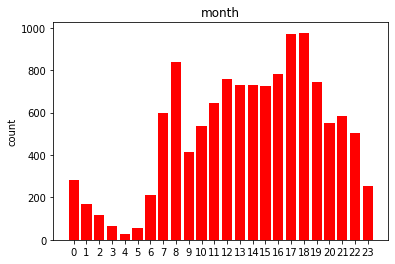

In [ ]:
plt.bar(data[:,3], data[:, -1], color='red')

plt.xticks(list(range(0, 24)))

plt.ylabel('count')
plt.title('month')
plt.show()